# Ejercicio 1

In [126]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  8 13:16:28 2021

@author: pnegr
"""

import numpy as np

## La funcion de activacion es tanh. Se devuelve tambien la derivada.
def activation(x):
    b = 2.5;
    x = b*x
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=(1-t**2)
    return t,b*dt

# La entrada consiste en un array cuyas columnas son los ejemplos de
# aprendizaje y cuyas lineas son los descriptores
X = np.array([[1, 1, -1, -1],[ 1, -1, 1, -1]])
[Ni, M]          = X.shape
No		           = 1
Nh               = 2
Theta            = 10e-3
eta              = 0.25 # ratio de aprendizaje
epochs           = 10 # son las iteraciones para el aprendizaje
# Las salidas esperadas o targets
T = np.array([-1, 1, 1, -1])

# Se inicializa la red
# Hay una sola neurona de salida, con lo cual entre las neuronas escondidas
# y la salida hay un vector de pesos. Entre la entrada y las neuronas
# escondidas hay una matriz de pesos.

# Hidden weights (NhxNi)
Wh = np.array([[0.3615, -1.4145], [ -0.8916,  0.2010]]).reshape((Nh,Ni))
# Output weights (NoxNh)
Wo = np.array([-1.1678 ,-0.2166]).reshape((1,Nh))
# Los bias se fijan a un valor igual a 1. No hay aprendizaje en ellos.
bo = 1
bh = 1

J       = np.zeros((epochs))
J[0]    = 1e3
m       = 0
while m < epochs:
    for i in range(M):
        # voy a tomar uno a uno los puntos para actualizar los pesos
        Xm = X[:,i].reshape((Ni,1))
        tk = T[i]
        # Forward propagation desde la entrada X
        # Calcular primero las aj en las neuronas escondidas
        aj				=  Wh@Xm + bh
        [y, dfh]		= activation(aj)
        # Calcular ahora el valor de salida utilizando lo precedente
        ak				=  Wo@y + bo
        [zk, dfo]	= activation(ak);
        # Ya se puede calcular la salida y el error cometido
        # Evaluar ahora el delta_k a la salida:
        delta_k		=  (tk - zk)*dfo
        #...y delta_j:
        delta_j		=  dfh*Wo.T@delta_k
        #% Ahora se actualizan los pesos
        ## los pesos de la capa de salida
        Wo				=  Wo + eta*delta_k*y.T
        ##% los pesos de la capa escondida
        Wh				=  Wh + eta*delta_j*Xm.T

    #Calculate total error
    J[m]    = 0;
    for i in range(M):
        Xm = X[:,i].reshape((Ni,1))
        aj = Wh@Xm + bh
        [y, dfh]		= activation(aj)
        ak = Wo@y + bo
        [zk, dfo]	= activation(ak);
        J[m] = J[m] + (T[i] - zk)**2;

    J[m] = J[m]/M;
    print('Iteracion %d: Error Total %f' % (m, J[m]))
    m = m + 1;

# El error a la salida debe ser aproximadamente 0.00071965
expErr = 0.00071965;
assert(np.abs(J[epochs-1]-expErr) < 1e-6)#, 'Error de implementacion')

# Resultado
for i in range(M):
    Xm = X[:,i].reshape((Ni,1))
    [y, dfh]		= activation(Wh @ Xm + bh*np.ones((Ni,1)))
    [zk, dfo]	= activation(Wo @ y + bo);

    print('X: [%d,%d], -> T(%d) Esperado: %f - Calculado: %f' % (X[0,i], X[1,i], i, T[i], zk))

Iteracion 0: Error Total 0.127748
Iteracion 1: Error Total 0.001366
Iteracion 2: Error Total 0.001224
Iteracion 3: Error Total 0.001110
Iteracion 4: Error Total 0.001016
Iteracion 5: Error Total 0.000938
Iteracion 6: Error Total 0.000871
Iteracion 7: Error Total 0.000814
Iteracion 8: Error Total 0.000764
Iteracion 9: Error Total 0.000720
X: [1,1], -> T(0) Esperado: -1.000000 - Calculado: -0.999623
X: [1,-1], -> T(1) Esperado: 1.000000 - Calculado: 0.994893
X: [-1,1], -> T(2) Esperado: 1.000000 - Calculado: 0.949452
X: [-1,-1], -> T(3) Esperado: -1.000000 - Calculado: -0.982759


/tmp/ipython-input-2722068087.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[m] = J[m] + (T[i] - zk)**2;
/tmp/ipython-input-2722068087.py:93: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('X: [%d,%d], -> T(%d) Esperado: %f - Calculado: %f' % (X[0,i], X[1,i], i, T[i], zk))


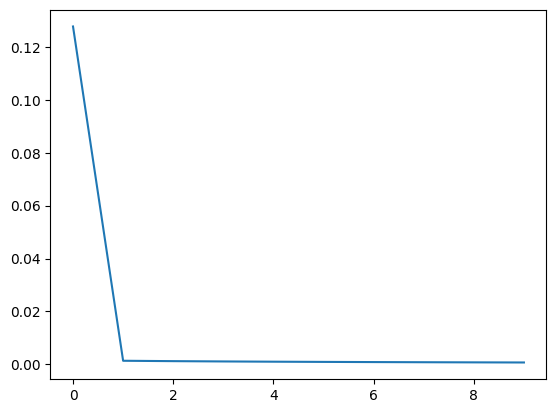

In [127]:
import matplotlib.pyplot as plt
plt.plot(J)

# Clase - Redes Neuronales
spike: delta de una señal muy chico que se activa bajo un umbral.
- La neurona actua como una pila. Al recibir varios spike seguidos hacen que el potencial alcance el threshold. Es la suma de los spikes. Luego de alcanzar el punto máximo, se descarga rapidamente y luego se carga.
- La descarga es para limitar el estado de la neurona.

En las redes uno suele no tener mucho feedback (o darse cuenta de dicho feedback), por lo que puede tener un falso positivo y creer que la red aprendió cuando, en realidad, no fue así. Lo mejor, es moverse entre intervalos chicos de valores para analizar paso a paso si la red aprendió correctamente.